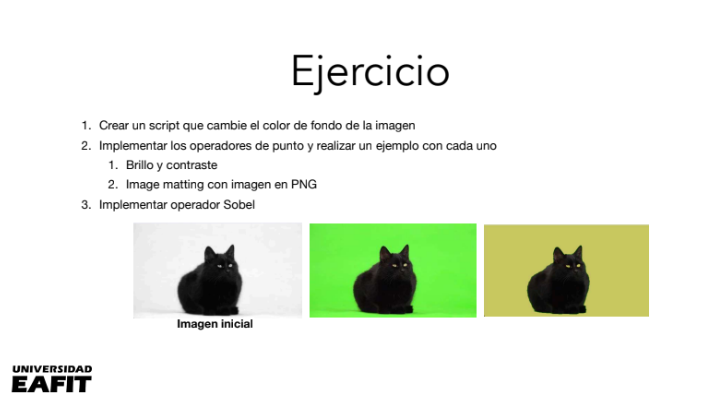

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Para mostrar imágenes en Google Colab
from google.colab import files  # Para cargar imágenes desde el sistema local en Google Colab

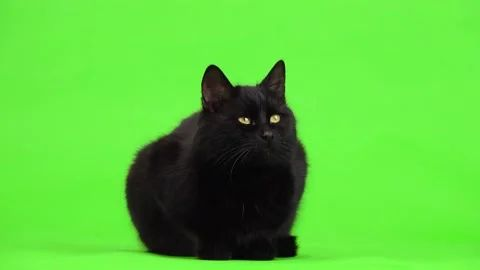

In [ ]:
'''# Función para cargar la imagen del gato desde el sistema local en Google Colab
def cargar_imagen():
    uploaded = files.upload()
    for filename in uploaded.keys():
        imagen = cv2.imread(filename)
    return imagen'''


# Cargar la imagen del gato
imagen_gato = cv2.imread('/content/drive/MyDrive/Vision/Ejercicios_clase/cat.jpg')
#Imagen original del gato
cv2_imshow(imagen_gato)

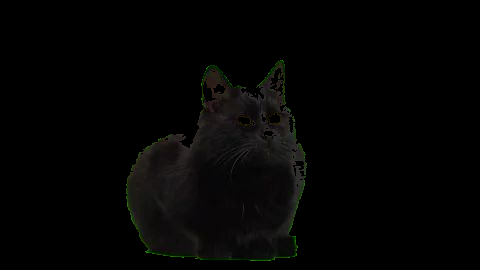

In [ ]:
# Cambiar el color de fondo de la imagen
nuevo_fondo = np.zeros_like(imagen_gato)  # Definir un fondo negro

# Función para obtener la máscara del gato
def obtener_mascara_gato(imagen):
    # gato está en formato BGR negro fondo es verde
    # definir máscara los píxeles negros (gato)
    negro_bajo = np.array([0, 0, 0])  # Umbral para píxeles negros (gato)
    negro_alto = np.array([50, 50, 50])

    mascara = cv2.inRange(imagen, negro_bajo, negro_alto)  # Generar la máscara
    return mascara
# Obtener la máscara del gato
mascara_gato = obtener_mascara_gato(imagen_gato)

# Combinar el gato con el nuevo fondo
mascara_expandida = cv2.merge([mascara_gato] * 3)  # Expandir la máscara a tres capas
nuevo_fondo = np.where(mascara_expandida, imagen_gato, nuevo_fondo)

# Mostrar la imagen con el nuevo fondo
cv2_imshow(nuevo_fondo)

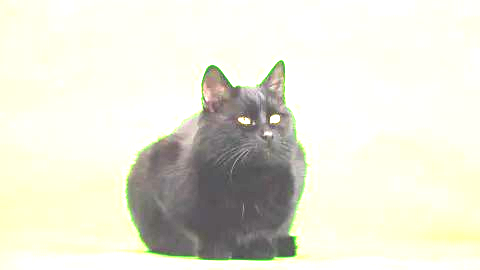

In [ ]:
#Implementar los operadores de punto (brillo y contraste)
# Ajustar el brillo y el contraste
brillo = 70
contraste = 2.5
brillo_contraste = np.clip(contraste * imagen_gato + brillo, 0, 255).astype(np.uint8)

# Mostrar la imagen con el brillo y contraste ajustados
cv2_imshow(brillo_contraste)

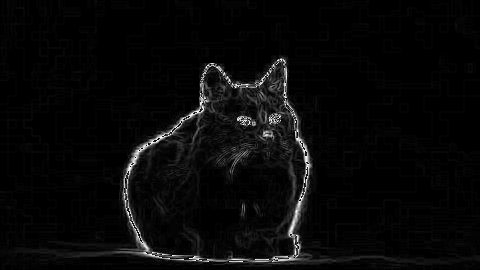

In [ ]:
# Operador Sobel
# Convertir la imagen a escala de grises
imagen_gris = cv2.cvtColor(imagen_gato, cv2.COLOR_BGR2GRAY)
# Aplicar el operador Sobel
sobel_x = cv2.Sobel(imagen_gris, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(imagen_gris, cv2.CV_64F, 0, 1, ksize=3)
# Combinar las magnitudes de los gradientes
magnitud_gradiente = np.sqrt(sobel_x**2 + sobel_y**2)
magnitud_gradiente = np.uint8(magnitud_gradiente)
# Mostrar la imagen con los bordes resaltados usando el operador Sobel
cv2_imshow(magnitud_gradiente)